# Lista de bordes doblemente conectados

                                                                                                   Jueves 14/FEB/2019
160300102 / Méndez Pool Joan de Jesús

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#from maps_overlay import *

# Mapa

Podemos definir a un **mapa** como una **incrustación** de un grafo conectado en el plano:

* Llamamos **vértices** a los nodos del grafo y **bordes** a sus arcos.
* Las aristas son líneas rectas.

# Lista de bordes [aristas] doblemente conectados 


Una lista de bordes doblemente conectados es una estructura que registra la información geométrica de los elementos de un mapa.

1. Vértices
2. Bordes
3. Caras

**El objetivo de una lista de bordes doblemente conectados es el de facilitar al álgebra de mapas.**

La lista de bordes doblemente conectados debe facilitar las siguientes operaciones:

* Listar los bordes adyacentes a un vértice
* Listar las caras adyacentes a un borde
* Recorrer los bordes de una cara

<img src="map_overlay.png"/>


# Construcción de la lista de bordes doblemente ligada

* **Tabla de vértices**

Debe listar 

* Coordenadas de los vértices
* Un semiborde adyacente al vértice

In [2]:
v_x = [0,1,2,3,2,1,1.5]
v_y = [0,1,1,0,-1,-1,0]
vn = ["v1", "v2", "v3", "v4", "v5", "v6", "v7"]
b = ["b12", "b21", "b34", "b45", "b56", "b61", "b72"] #semi-bordes adyacentes
v_s = {"x": pd.Series(v_x), "y": pd.Series(v_y), "b": b}
v = pd.DataFrame(v_s, columns=["x","y","b"])
v.index = vn
v

,x,y,b
v1,0.0,0,b12
v2,1.0,1,b21
v3,2.0,1,b34
v4,3.0,0,b45
v5,2.0,-1,b56
v6,1.0,-1,b61
v7,1.5,0,b72


* **Tabla de semi-bordes**

Para cada semiborde, lista:

* Semiborde *gemelo*
* Semiborde siguiente
* Semiborde previo
* Vértice del cual se origina el semiborde
* Cara a la cual es adyacente el semiborde

In [3]:
bords_n = ["b12", "b21", "b23", "b32", "b34", "b43", "b45", "b54", "b56", "b65", "b61", "b16", "b27", "b72", "b37", "b73", "b57", "b75", "b67", "b76"]
twins = ["b21", "b12", "b32", "b23", "b43", "b34", "b54", "b45", "b65", "b56", "b16", "b61", "b72", "b27", "b73", "b37", "b75", "b57", "b76", "b67"]
next_b = ["b23", "b16", "b34", "b27", "b45", "b37", "b56", "b43", "b61", "b57", "b12", "b67", "b73", "b21", "b75", "b32", "b76", "b54", "b72", "b65"]
prev_b = ["b61", "b72", "b12", "b73", "b23", "b54", "b34", "b75", "b45", "b76", "b56", "b21", "b32", "b67", "b43", "b27", "b65", "b37", "b16", "b57"]
vert_or = ["v1", "v2", "v2", "v3", "v3", "v4", "v4", "v5", "v5", "v6", "v6", "v1", "v2", "v7", "v3", "v7", "v5", "v7", "v6", "v7"]
fs = ["f5", "f1", "f5", "f2", "f5", "f3", "f5", "f3", "f5", "f4", "f5", "f1", "f2", "f1", "f3", "f2", "f4", "f3", "f1", "f4"]

b_dict = {"twin": twins, "next": next_b, "prev": prev_b, "vert_or":vert_or, "f": fs}
bordes = pd.DataFrame(b_dict, columns=["vert_or", "twin", "next", "prev", "f"])
bordes.index = bords_n
bordes

,vert_or,twin,next,prev,f
b12,v1,b21,b23,b61,f5
b21,v2,b12,b16,b72,f1
b23,v2,b32,b34,b12,f5
b32,v3,b23,b27,b73,f2
b34,v3,b43,b45,b23,f5
b43,v4,b34,b37,b54,f3
b45,v4,b54,b56,b34,f5
b54,v5,b45,b43,b75,f3
b56,v5,b65,b61,b45,f5
b65,v6,b56,b57,b76,f4


* **Tabla de caras**

Lista un semiborde interno y en caso de existir, un semiborde interno.

In [4]:
fs = ["f1", "f2", "f3", "f4", "f5"]
brds_ext = ["b21", "b32", "b43", "b76", None]
brds_int = [[], [], [], [], ["b12"]]

f_dict = {"b_ext": brds_ext, "b_int": brds_int}
caras = pd.DataFrame(f_dict)
caras.index = fs
caras

,b_ext,b_int
f1,b21,[]
f2,b32,[]
f3,b43,[]
f4,b76,[]
f5,None,[b12]


### Funciones básicas para la graficación de mapas 

Utilizando la lista de bordes doblemente conectados, construimos algunas funciones utilitarias:

La función determinada <i>lista_bords2map()</i> se encarga de graficar la lista de bordes doblemente conectados con ayuda de la librería matplotlib, nos encargamos de quitar el plano del fondo y a graficar los vertices en el espacio, creamos una lista donde guardaremos los gemelos de los segmentos de recta del mapa para no repetir la graficación de los bordes.

In [5]:
def lista_bords2map(v, bordes, vc='b', bc='k'):
    twins=[]
    plt.axis('off')
    plt.scatter(np.array(v.x), np.array(v.y), c=vc)
    for i, bo in bordes.iterrows():
        if not i in twins:
            vin = bo['vert_or']
            vfi = bordes.loc[bo['twin']]['vert_or']
            twins.append(bo['twin'])
            plt.plot( [v.loc[vin]['x'], v.loc[vfi]['x']], [v.loc[vin]['y'], v.loc[vfi]['y']], c=bc)
    plt.show()

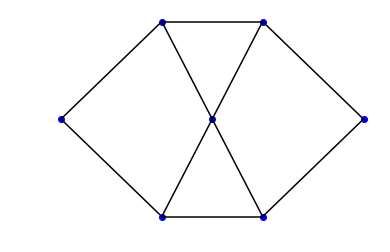

In [6]:
lista_bords2map(v,bordes)

La función <i>lista_semibordes_ext()</i> se encarga de listar la frontera externa de una cara.

In [7]:
def lista_semibordes_ext(f, caras, bordes):
    way = []
    if caras.loc[f]['b_ext'] != None:
        val = "'" + str(f) + "'"
        sent = 'f==' + val
        qr = bordes.query(sent)
        e = caras.loc[f]['b_ext']
        way.append(e)
        e1 = qr.loc[e]['next']
        while (e1 != e):
            way.append(e1)
            e1 = qr.loc[e1]['next']
    else:
        way= None
    return way

##### Probando la función:

In [8]:
lista_semibordes_ext("f2", caras, bordes)

['b32', 'b27', 'b73']

##### Usando la función en todas las caras del mapa:

In [9]:
lis = list(caras.index)
for li in lis:
    print "Cara " + str(li)
    print lista_semibordes_ext(li, caras, bordes)

Cara f1
['b21', 'b16', 'b67', 'b72']
Cara f2
['b32', 'b27', 'b73']
Cara f3
['b43', 'b37', 'b75', 'b54']
Cara f4
['b76', 'b65', 'b57']
Cara f5
None


La función <i>lista_semibordes_int()</i> se encarga de listar la frontera interna de una cara.

In [10]:
def lista_semibordes_int(f, caras, bordes):
    fi = []
    arr = caras.loc[f]['b_int']
    way = []
    if arr:
        val = "'" + str(f) + "'"
        sent = 'f==' + val
        qr = bordes.query(sent)
        for w in arr:
            e = w
            way.append(e)
            e1 = qr.loc[e]['next']
            while (e1 != e):
                way.append(e1)
                e1 = qr.loc[e1]['next']
            fi.append(way)
            way = []
    else:
        fi= []
    return fi

##### Probando la función:

In [11]:
lista_semibordes_int("f5", caras, bordes)

[['b12', 'b23', 'b34', 'b45', 'b56', 'b61']]

##### Usando la función en todas las caras del mapa:

In [12]:
lis = list(caras.index)
for li in lis:
    print "Cara " + str(li)
    print lista_semibordes_int(li, caras, bordes)

Cara f1
[]
Cara f2
[]
Cara f3
[]
Cara f4
[]
Cara f5
[['b12', 'b23', 'b34', 'b45', 'b56', 'b61']]


La función determinada <i>lista_semibordes_vertice()</i> se encarga de listar todos los segmentos de recta que tiene como origen determinado vertice.

In [13]:
def lista_semibordes_vertice(vt, v, bordes):
    bor = []
    e = v.loc[vt]['b']
    bor.append(e)
    e1 = bordes.loc[bordes.loc[e]['twin']]['next']
    while (e1 != e):
        bor.append(e1)
        e1 = bordes.loc[bordes.loc[e1]['twin']]['next']
    return bor

##### Probando la función:

In [14]:
lista_semibordes_vertice("v2", v, bordes)

['b21', 'b23', 'b27']

In [15]:
lista_semibordes_vertice("v5", v, bordes)

['b56', 'b57', 'b54']

##### Usando la función en todos los vertices del mapa:

In [16]:
lis = list(v.index)
for li in lis:
    print "Vertice " + str(li)
    print lista_semibordes_vertice(li, v, bordes)

Vertice v1
['b12', 'b16']
Vertice v2
['b21', 'b23', 'b27']
Vertice v3
['b34', 'b37', 'b32']
Vertice v4
['b45', 'b43']
Vertice v5
['b56', 'b57', 'b54']
Vertice v6
['b61', 'b67', 'b65']
Vertice v7
['b72', 'b73', 'b75', 'b76']


La función determinada <i>map_cara()</i> se encarga de graficar todas las fonteras de una determinada cara, ya sea la frontera interna o externa, las frontera externa se pinta de color azul y las fronteras internas se pintan de color rojo, de igual forma se encarga de listar el orden en el que los segmentos de recta son conectados, para obtener la lista de las fronteras externas se usa la función <i>lista_semibordes_ext()</i> y para obtener la lista de las fronteras internas usamos la otra función definida anteriormente llamada <i>lista_semibordes_int()</i>.

In [17]:
def map_cara(f, caras, bordes, v, inter='b', exter='r'):
    pa = []
    plt.axis('off')
    plt.scatter(np.array(v.x), np.array(v.y), c='k')
    if caras.loc[f]['b_ext'] != None:
        ext = lista_semibordes_ext(f, caras, bordes)
        xmi=np.inf; xma=-1*np.inf; ymi=np.inf; yma=-1*np.inf;
        n=1
        for ex in ext:
            x1 = v.loc[bordes.loc[ex]['vert_or']]['x']
            x2 = v.loc[bordes.loc[bordes.loc[ex]['twin']]['vert_or']]['x']
            y1 = v.loc[bordes.loc[ex]['vert_or']]['y']
            y2 = v.loc[bordes.loc[bordes.loc[ex]['twin']]['vert_or']]['y']
            plt.plot([x1, x2], [y1, y2],c=inter)
            plt.text( float(x1+x2)/2, float(y1+y2)/2, str(n), fontsize=10)
            n+=1
            pa.extend([ ex , bordes.loc[ex]['twin'] ])
            x1, x2 = (x1, x2) if (x1<x2) else (x2, x1)
            y1, y2 = (y1, y2) if (y1<y2) else (y2, y1)
            xmi = (x1) if (x1<xmi) else (xmi)
            xma = (x2) if (x2>xma) else (xma)
            ymi = (y1) if (y1<ymi) else (ymi)
            yma = (y2) if (y2>yma) else (yma)
        plt.text( float(xmi+xma)/2, float(ymi+yma)/2, str(f), fontsize=10)
    if caras.loc[f]['b_int']:
        inte = lista_semibordes_int(f, caras, bordes)
        for row in inte:
            n = 1
            for cel in row:
                x1 = v.loc[bordes.loc[cel]['vert_or']]['x']
                x2 = v.loc[bordes.loc[bordes.loc[cel]['twin']]['vert_or']]['x']
                y1 = v.loc[bordes.loc[cel]['vert_or']]['y']
                y2 = v.loc[bordes.loc[bordes.loc[cel]['twin']]['vert_or']]['y']
                plt.plot([x1, x2], [y1, y2],c=exter)
                plt.text( float(x1+x2)/2, float(y1+y2)/2, str(n), fontsize=10)
                n+=1
                pa.extend([ cel , bordes.loc[cel]['twin'] ])
    for i, bo in bordes.iterrows():
        if not i in pa:
            vin = bo['vert_or']
            vfi = bordes.loc[bo['twin']]['vert_or']
            pa.append(bo['twin'])
            plt.plot( [v.loc[vin]['x'], v.loc[vfi]['x']], [v.loc[vin]['y'], v.loc[vfi]['y']], c='k')
    plt.show() 

##### Probando la función:

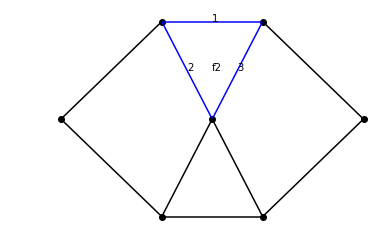

In [18]:
map_cara("f2", caras, bordes, v)

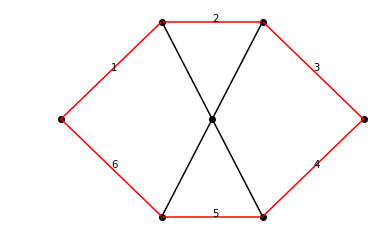

In [19]:
map_cara("f5", caras, bordes, v)

##### Usando la función en todas las caras del mapa:

Cara f1


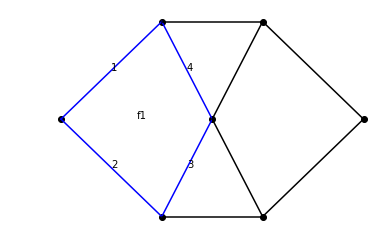

Cara f2


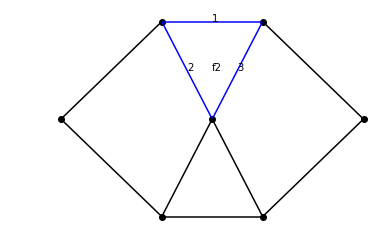

Cara f3


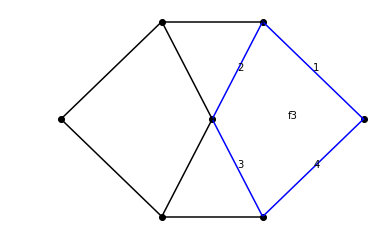

Cara f4


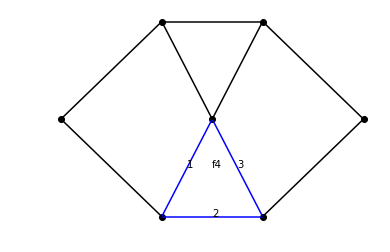

Cara f5


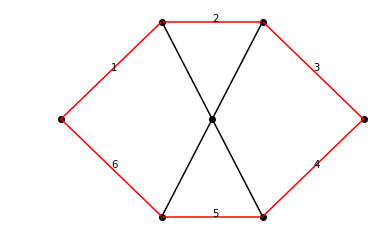

In [20]:
lis = list(caras.index)
for li in lis:
    print "Cara " + str(li)
    map_cara(li, caras, bordes, v)

La función determinada <i>map_brds_vert()</i> se encarga de graficar los segmentos de recta que tienen origen en un vertice, para obtener la lista de los segmentos que tienen por origen a cierto vertice usamos la función <i>lista_semibordes_vertice()</i>, de igual forma solo se evalua un segmento exceptuando los gemelos de cada borde.

In [21]:
def map_brds_vert(vo, v, bordes, cb='r'):
    pa = []
    plt.axis('off')
    plt.scatter(v.x, v.y, c='k')
    smbo = lista_semibordes_vertice(vo, v, bordes)
    for sb in smbo:
        vin = bordes.loc[sb]['vert_or']
        vfi = bordes.loc[bordes.loc[sb]['twin']]['vert_or']
        plt.plot([ v.loc[vin]['x'], v.loc[vfi]['x'] ],[ v.loc[vin]['y'], v.loc[vfi]['y'] ], c=cb)
        pa.extend([sb, bordes.loc[sb]['twin']])
    for i, bo in bordes.iterrows():
        if not i in pa:
            vin = bo['vert_or']
            vfi = bordes.loc[bo['twin']]['vert_or']
            pa.append(bo['twin'])
            plt.plot( [v.loc[vin]['x'], v.loc[vfi]['x']], [v.loc[vin]['y'], v.loc[vfi]['y']], c='k')
    plt.show()

##### Probando la función:

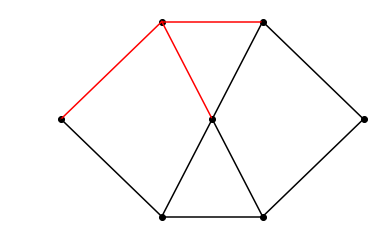

In [22]:
map_brds_vert("v2", v, bordes)

##### Usando la función en todos los vertices del mapa:

Vertice v1


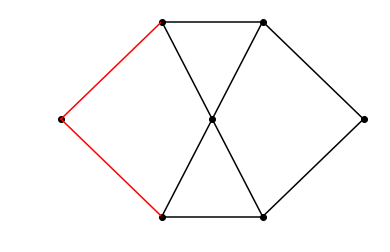

Vertice v2


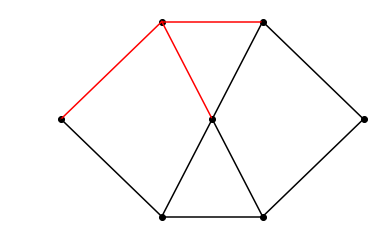

Vertice v3


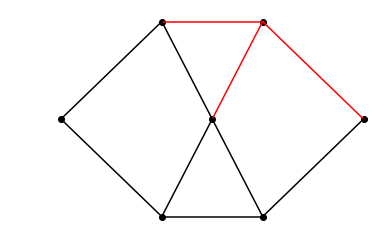

Vertice v4


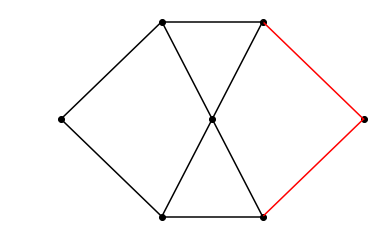

Vertice v5


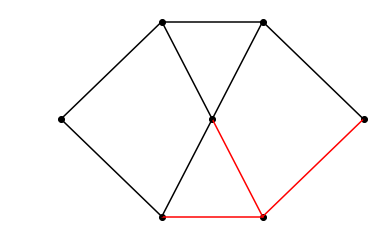

Vertice v6


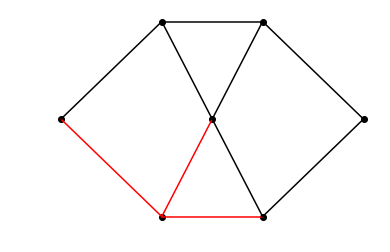

Vertice v7


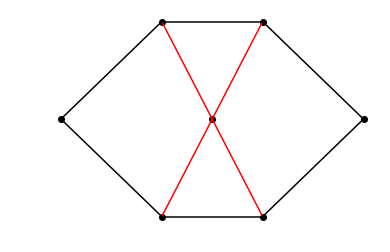

In [23]:
lis = list(v.index)
for li in lis:
    print "Vertice " +  str(li)
    map_brds_vert(li, v, bordes)

## Conclusión

Realizar la construcción de las funciones para graficar mapas no es tan complicado, con la ayuda de la librería <i>Pandas</i> de <i>Python</i> para el manejo de DataFrames con el cual podemos filtrar y almacenar información de forma sencilla, la función más complicada y larga de construir fue <i>map_cara()</i> ya que se necesitaba saber la lógica que compone a la estructura como tal, una cara tiene una sola frontera externa y puede poseer varias fronteras internas, por lo cual fue la separación en dos colores para diferenciar entre fronteras. Por otra parte fue de gran ayuda desarrollar las funciones denominadas:
<ul>
    <li>lista_semibordes_ext()</li>
    <li>lista_semibordes_int()</li>
    <li>ista_semibordes_vertice()</li>
</ul> 
Estas funciones fueron de ayuda para realizar las últimas dos funciones ya que nos permiten obtener listas con los indices de identificación de los bordes para la graficación de segmentos sin repetir la graficación de los gemelos de cada segmento. Las primeras dos funciones fueron útiles para las composición de <i>map_cara()</i> y la de <q>lista de semibordes</q> fue de utilidad para la composición de <i>map_brds_vert()</i>.